In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam (1).csv' , encoding = 'latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1516,ham,I need to come home and give you some good lov...,NaN,NaN,NaN
2943,spam,We currently have a message awaiting your coll...,NaN,NaN,NaN
1975,ham,Delhi and chennai still silent.,NaN,NaN,NaN
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...,NaN,NaN,NaN
2947,ham,Nope but i'll b going 2 sch on fri quite early...,NaN,NaN,NaN


In [5]:
# data cleaning
# EDA
# Text preprocessing
# model building
# evaluation
# improvement
# website
# deploy

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.sample(5)


,v1,v2
3262,ham,So u gonna get deus ex?
762,spam,Urgent Ur å£500 guaranteed award is still uncl...
5148,ham,K..then come wenever u lik to come and also te...
4447,ham,I sent them. Do you like?
2645,ham,"Sorry, I'll call later"


In [10]:
#  renaming the columns
df.rename(columns={'v1' : 'spam/ham', 'v2' : 'text'}, inplace = True)

In [11]:
df.sample(5)


,spam/ham,text
3313,ham,Oh gei. That happend to me in tron. Maybe ill ...
916,ham,Was actually about to send you a reminder toda...
5203,ham,Me fine..absolutly fine
1626,ham,Dear how you. Are you ok?
1295,ham,TELL HER I SAID EAT SHIT.


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['spam/ham'] = encoder.fit_transform(df['spam/ham'])

In [14]:
df.head()

,spam/ham,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# checking for missing values
df.isnull().sum()

spam/ham    0
text        0
dtype: int64

In [16]:
# checking for duplicate values
df.duplicated().sum()

403

In [17]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [20]:
df.head()

,spam/ham,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['spam/ham'].value_counts()

spam/ham
0    4516
1     653
Name: count, dtype: int64

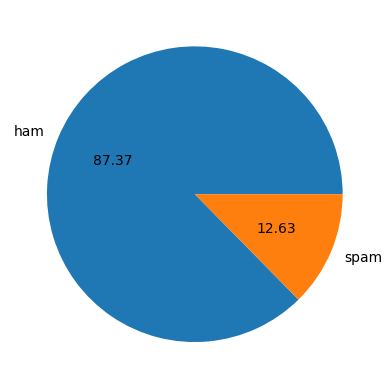

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['spam/ham'].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [23]:
# data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# threw an error or warning to copy the dataframe
df = df.copy()

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,spam/ham,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# fetching the no of words
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [30]:
# tokenizing words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
df.head()

,spam/ham,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# fetching the no of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df.head()


,spam/ham,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# analyzing ham and spam seperately

# only for ham mesasages... displays only if spam/ham column value is '0'
df[df['spam/ham'] == 0][['num_characters', 'num_words' , 'num_sentences']].describe()

# mean of sentences is 2 but the max is 38----> outlier
# mean of words is 17 but the max is 220----> outlier
# mean of characters is 70 but the max is 910----> outlier

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# only for spam mesasages... displays only if spam/ham column value is '1'
# [[]] to pass list
df[df['spam/ham'] == 1][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
# mean of words is 46 but the max is 27----> outlier
# mean of sentences is 2.9 ~ 3 but the max is 9----> outlier


<Axes: xlabel='num_characters', ylabel='Count'>

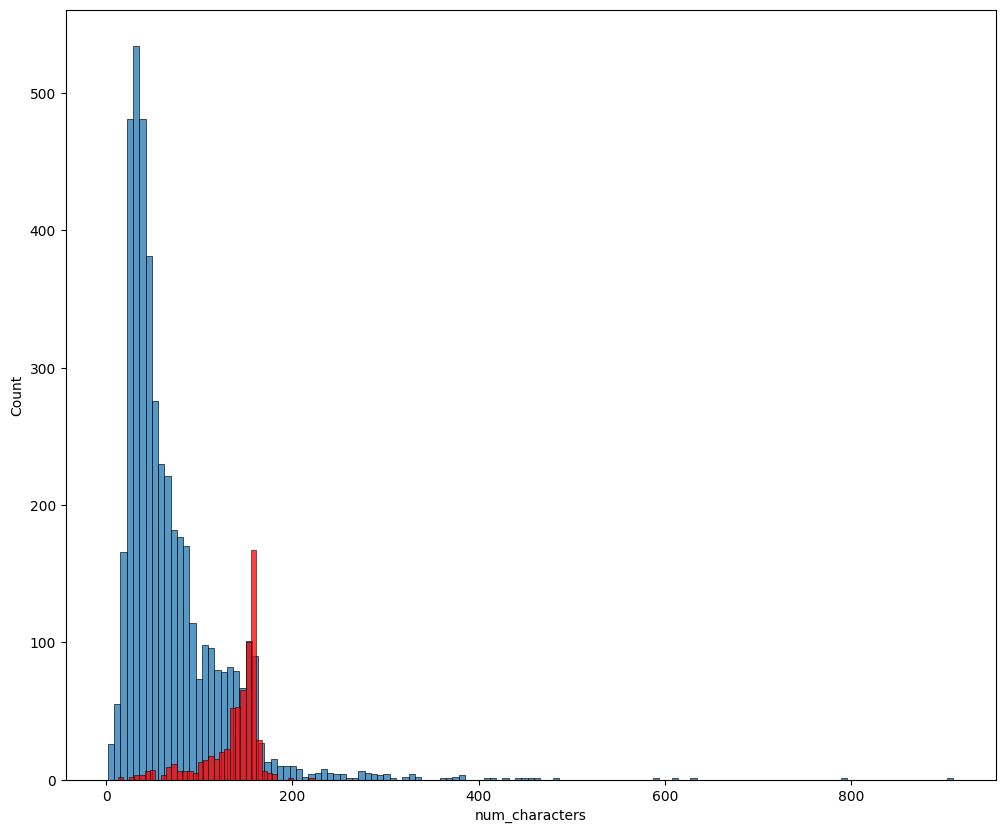

In [38]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(df[df['spam/ham'] == 0]['num_characters'])
sns.histplot(df[df['spam/ham'] == 1]['num_characters'], color='red')

In [39]:
# ham messages have many characters 
# spam messages have less characters 

<Axes: xlabel='num_words', ylabel='Count'>

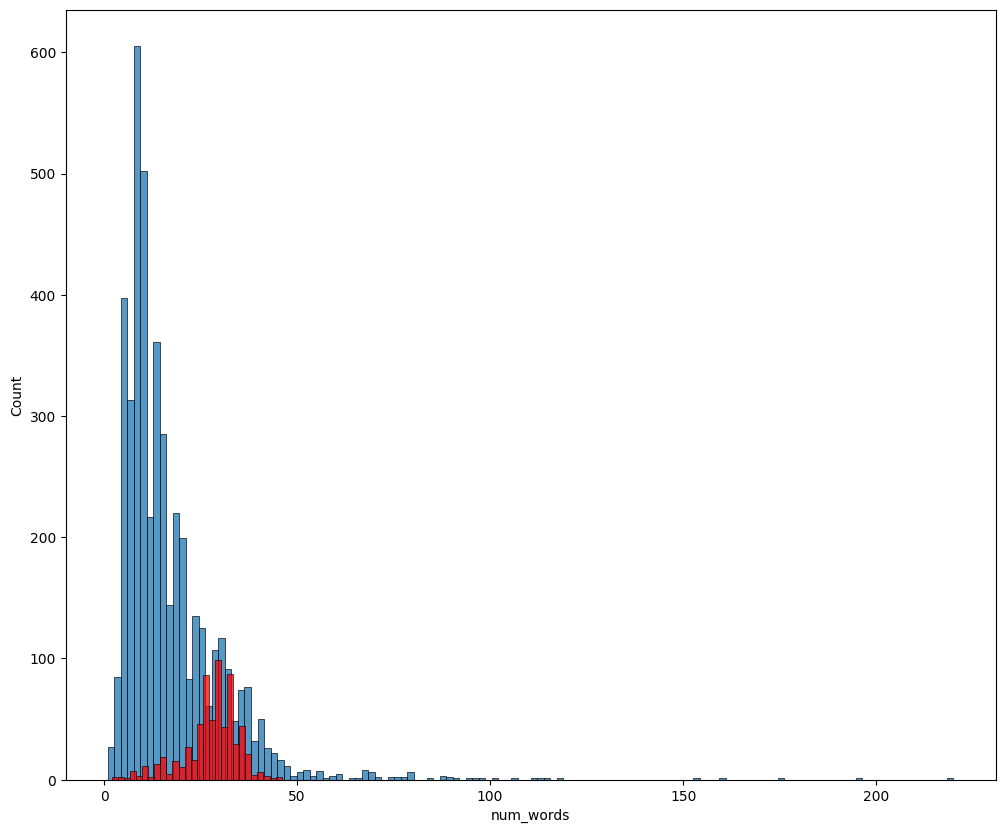

In [40]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['spam/ham'] == 0]['num_words'])
sns.histplot(df[df['spam/ham'] == 1]['num_words'], color='red')

In [41]:
# ham messages have many words 
# spam messages have less words

In [42]:
# we can observe that there are some outliers from the hostogram
# there are some sentences which are of 200+ words too

In [43]:
# df.corr()     ------> ERROR

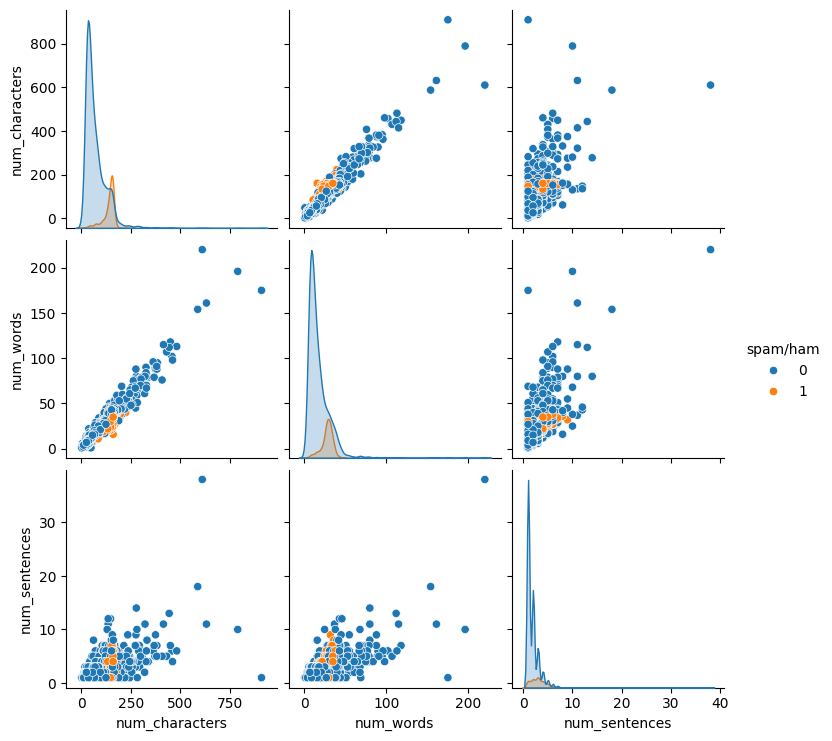

In [44]:
# correlation coffecient
sns.pairplot(df, hue='spam/ham') 

In [45]:
# # Attempt to convert all columns to numeric, setting errors='coerce' will turn non-convertible data into NaN
# df = df.apply(pd.to_numeric, errors='coerce')

# # Select only numeric columns
# numeric_df = df.select_dtypes(include=[np.number])

# # Calculate the correlation matrix
# correlation_matrix = numeric_df.corr()

# print(correlation_matrix)

df_dropped1 = df.drop(columns=['text'])
df_dropped1.corr()


,spam/ham,num_characters,num_words,num_sentences
spam/ham,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


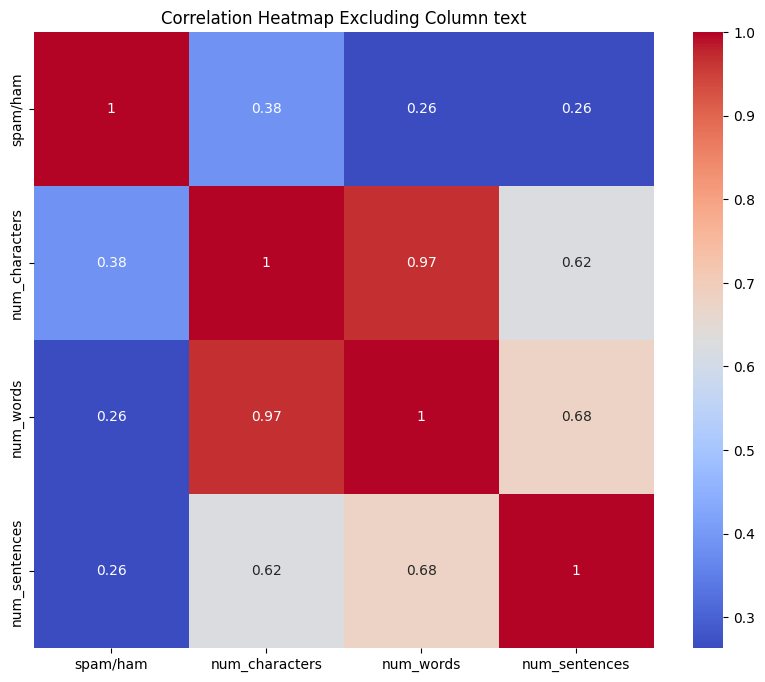

In [46]:
# sns.heatmap(df.corr(), annot=True)
# here the text column is not required so dropping the column for the heatmap

# Drop a specific column, 'text'
df_dropped = df.drop(columns=['text'])

# Calculate the correlation matrix
correlation_matrix = df_dropped.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Excluding Column text')
plt.show()

In [47]:
# # there are some non numeric values
# # Identify non-numeric columns
# non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
# print("Non-numeric columns:", non_numeric_columns)

# # Examine non-numeric data
# for col in non_numeric_columns:
#     print(f"Column: {col}")
#     print(df[col].head())

# # Drop non-numeric columns for the correlation calculation
# df_numeric = df.drop(columns=non_numeric_columns)

# # Alternatively, you can convert some columns to numeric if applicable
# # df['some_numeric_column'] = pd.to_numeric(df['some_numeric_column'], errors='coerce')

# # Compute the correlation matrix and create the heatmap
# correlation_matrix = df_numeric.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [48]:
# top words used in spam/ham

## Data PreProcessing
- lower case
- tokenization
- removing spcl characters
- removing stop words and punctuation (E.g., is, of, the, and) 
- stemming(dance,dancing,dances = dance)

In [49]:
def transform_text(text):
    text = text.lower()  # changing all the letters to lower case
    text = nltk.word_tokenize(text)  # tokenizing all the words in the text

    y = []
    for i in text:
        if i.isalnum():    #isalnum = is alpha numeric---> removing all special characters
            y.append(i)

    text = y[:]     #appending list--> list cloning can't capy a list like text=y
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:    #removing stop words and punctuation
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))    #stemming

    
    return " ".join(y)        # returning as a string

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('writing')

'write'

In [54]:
# transform_text('Hi how Are You !!@@20') 
transform_text('I love watching YOUTUBE lectures on machine learning. How about you?!') 
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.") 

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [55]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [56]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,spam/ham,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Creating a word cloud

In [59]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'Black')

In [60]:
wc.generate(df[df['spam/ham'] == 1]['transformed_text'].str.cat(sep=" "))  #filtering and catching the rows which are spam

In [61]:
spam_wc = wc.generate(df[df['spam/ham'] == 1]['transformed_text'].str.cat(sep=" "))  #filtering and catching the rows which are spam

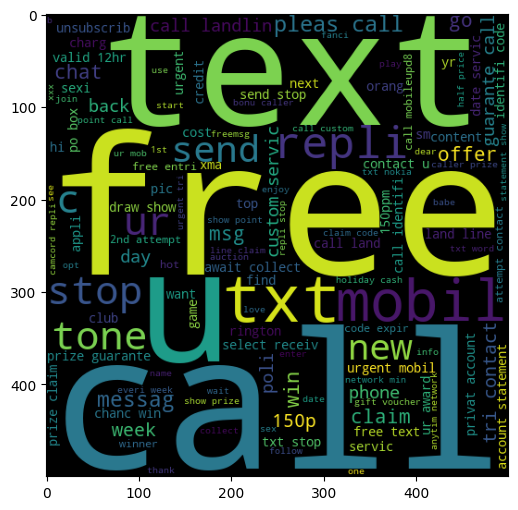

In [62]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

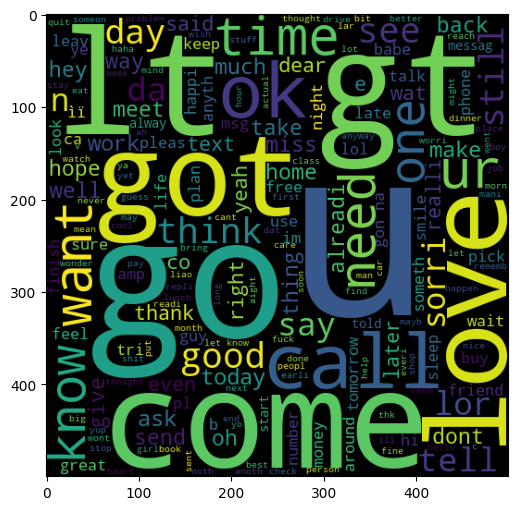

In [63]:
# repeating the same thing for ham messages
ham_wc = wc.generate(df[df['spam/ham'] == 0]['transformed_text'].str.cat(sep=" "))  #filtering and catching the rows which are ham

plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [64]:
# extraction top 30 words from spam
spam_corpus = []
for msg in df[df['spam/ham'] == 1]['transformed_text'].tolist():   #using tolist() converting into list:
    for word in msg.split():
        spam_corpus.append(word)

In [65]:
len(spam_corpus)

9939

In [66]:
from collections import Counter 
Counter(spam_corpus)
# creates a dictionery for number of repetitions of the words

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [67]:
from collections import Counter 
pd.DataFrame(Counter(spam_corpus).most_common(30))
# creates a dictionery for number of repetitions of the words

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


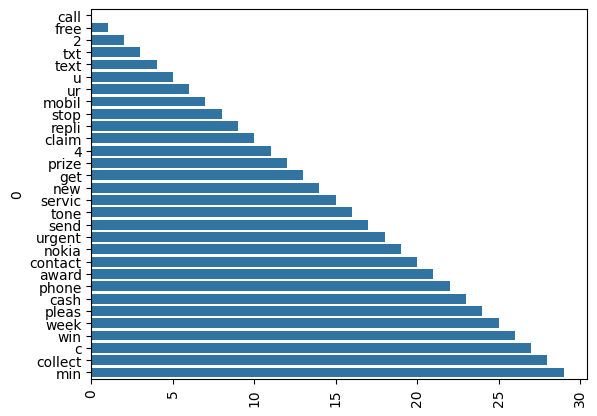

In [68]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = 'vertical')
plt.show()

In [69]:
# extraction top 30 words from ham 
ham_corpus = []
for msg in df[df['spam/ham'] == 0]['transformed_text'].tolist():   #using tolist() converting into list:
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
Counter(ham_corpus)
# creates a dictionery for number of repetitions of the words

pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<Axes: ylabel='0'>

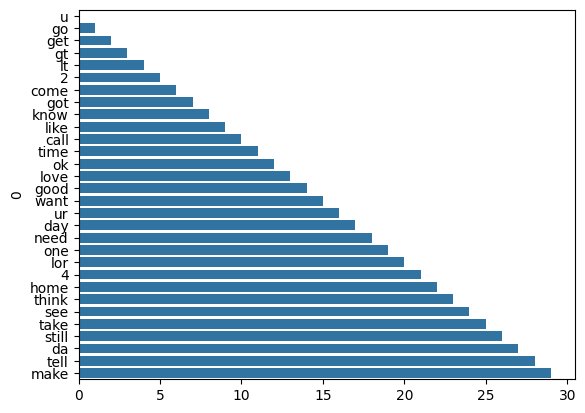

In [71]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

In [72]:
# text vectorization
# using a bag of words
df.head()

,spam/ham,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Model Building

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Feature Extraction using TF-IDF Vectorizer
# Feature Extraction
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['text'])
y = df['spam/ham']

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.941972920696325
Confusion Matrix:
 [[894   2]
 [ 58  80]]


In [ ]:
# Function to predict if a new message is spam or not
def predict_spam(message):
    # Preprocess the message
    processed_message = transform_text(message)
    # Transform the message using the fitted TF-IDF vectorizer
    transformed_message = tfidf.transform([processed_message])
    # Predict using the trained model
    prediction = model.predict(transformed_message)
    return 'spam' if prediction[0] == 1 else 'ham'

# Example usage
new_message = input("Enter a message to classify: ")
result = predict_spam(new_message)
print(f"The message is classified as: {result}")